# Assignment 1 : Filters & Edge Detection
Xiao-Bao Bao
April 10, 2022

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Input img shape:  (600, 800, 3)
NUm pixels:  1440000


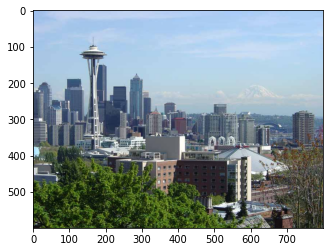

In [1]:
import os
import numpy as np
import scipy as sc
import cv2 as cv
from scipy import ndimage
from skimage import filters
from matplotlib import pyplot as plt
# import seaborn as sns
from PIL import Image
# sns.set(context='poster')
from loguru import logger
%matplotlib inline

seattleImg = Image.open(os.getcwd() + '/hw1_data/Seattle.jpg')
print(type(seattleImg))
seattleImg = np.asarray(seattleImg)
print("Input img shape: ", seattleImg.shape)
print("Num pixels: ", seattleImg.size)
plt.imshow(seattleImg)

In [10]:
def convolve1D(image, filter):
    image = np.asarray(image)
    print("Filter type: ", type(filter))
    filter_length = filter.shape[0]
    source_pix = 0
    print(source_pix)
    sum = 0

    # print(source_pix)
    print("Image shape: ", image.shape)

    for source_pix in range(source_pix, image.shape[0] - int(filter_length/2)*2):
        print("Source index: ", source_pix)
        for j in range(filter_length): 
            sum += filter[j] * image[source_pix + j]
            print(filter[j] , " ", image[source_pix + j], " ", sum)
        # print(sum / filter_length)
        center = source_pix + int(filter_length/2)
        print(center)
        image[center] = int(sum/filter_length)
        sum = 0

    # TODO Need to handle padding

    return image    

box_filter = np.ones((3,), dtype=float)
side_filter = [1, 0, -1]
side_filter = np.array(side_filter, dtype=float)
print(type(side_filter))
print(side_filter.shape)
test_image = [1, 2, 3, 4, 5, 6, 7, 8, 9]

print(convolve1D(test_image, side_filter))



<class 'numpy.ndarray'>
(3,)
Filter type:  <class 'numpy.ndarray'>
0
Image shape:  (9,)
Source index:  0
1.0   1   1.0
0.0   2   1.0
-1.0   3   -2.0
1
Source index:  1
1.0   0   0.0
0.0   3   0.0
-1.0   4   -4.0
2
Source index:  2
1.0   -1   -1.0
0.0   4   -1.0
-1.0   5   -6.0
3
Source index:  3
1.0   -2   -2.0
0.0   5   -2.0
-1.0   6   -8.0
4
Source index:  4
1.0   -2   -2.0
0.0   6   -2.0
-1.0   7   -9.0
5
Source index:  5
1.0   -3   -3.0
0.0   7   -3.0
-1.0   8   -11.0
6
Source index:  6
1.0   -3   -3.0
0.0   8   -3.0
-1.0   9   -12.0
7
[ 1  0 -1 -2 -2 -3 -3 -4  9]


<class 'PIL.PngImagePlugin.PngImageFile'>
Input img shape:  (512, 512, 3)


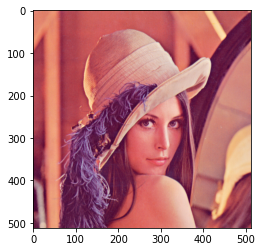

In [20]:
# Open the test image with PIL image
lenna_image = Image.open(os.getcwd() + '/Lenna_(test_image).png')
print(type(lenna_image))
lenna_image = np.asarray(lenna_image)
print("Input img shape: ", lenna_image.shape)
plt.imshow(lenna_image)


In [24]:
# Open the test image with OpenCV 
lenna_cv = cv.imread('Lenna_(test_image).png')
# lenna_cv = cv.cvtColor(lenna_cv, cv.COLOR_BGR2RGB) only used for converting PIL (BGR) -> CV2 (RGB)
cv.imshow('lenna', lenna_cv)
cv.waitKey(0)
cv.destroyAllWindows()

115

In [2]:
# Converts the image to gray scale
def preprocessImage(image):
    cv_image = cv.imread(image)
    return cv.cvtColor(cv_image, cv.COLOR_BGR2GRAY)

In [ ]:
# Takes 2d image and kernal numpy array objects
def convolve2D(image, kernal, padding=0, strides=1):
    xImgShape = image[0]
    yImgShape = image[1]
    xKernalShape = image[0]
    yKernalShape = image[1]

    

In [ ]:
def convolve2D(image, filter):
    # image is type PIL Image
    # filter is a np.array object
    
    # Convert image into numpy array
    image = np.asarray(image)
    
    x = filter.shape[0] / 2
    y = filter.shape[1] / 2 # coordinates for the image pixel
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            sum = 0
            for c in range (filter.shape[0]):
                for r in range (filter.shape[1]):
                   sum += image[x][y] * filter[c][r]
            print(sum)
            image[x][y] = sum
    
    return image

# box_filter = np.ones((3,3), dtype=float)
# box_filter *= (1/9)

# print(box_filter)

# sample_img = np.ones((9,9), dtype=float)

# filtered = convolve(sample_img, box_filter)
# print(filtered)

## 1. 

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Input img shape:  (600, 800, 3)


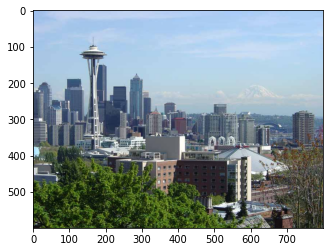

In [2]:
def GaussianBlurImage(image, sigma)->Image:
    filter_size = 2 * int(sigma * 4 + 0.5) + 1
    print(f'filter size: {filter_size}')
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)

    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_size // 2
            y = j - filter_size // 2
            # print(x, y)
            gaussian_filter[i, j] = 1.0 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2)/(2 * sigma ** 2))
    
    print("Gaussian FIlter shape: ", gaussian_filter.shape)
    # plt.imshow(gaussian_filter)

    # ADD IMAGE PADDING
    # im_padded = np.pad(image, pad_width=((filter_size // 2, filter_size // 2), (filter_size // 2, filter_size // 2), (0, 0)), mode='constant', constant_values=0).astype(np.float32)
    # fig, (ax, ax_padded) = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
    # ax.imshow(image)
    # ax_padded.imshow(im_padded.astype(np.uint8))
    # plt.show()

    # PERFORM CONVOLUTION
    image_filtered = np.zeros_like(image, dtype=np.int8)
    for c in range(3): # 3 is chosen since the image is [x pix, y pix, n channels] where n = 3
        image_filtered[:, :, c] = sc.ndimage.convolve(image[:, :, c], gaussian_filter, mode='constant', cval=0.0)
        # print(image_filtered[:, :, c])

    image_filtered = np.clip(image_filtered, 0, 255).astype(np.int8)
    return image_filtered



filter size: 33
Gaussian FIlter shape:  (33, 33)
(600, 800, 3) <class 'numpy.ndarray'>


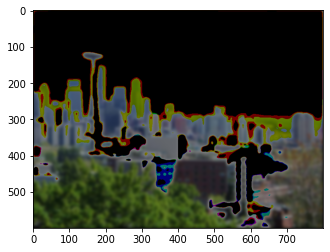

In [3]:
filtered_img = np.asarray(GaussianBlurImage(seattleImg, 4.0))
print(filtered_img.shape, type(filtered_img))
plt.imshow(filtered_img)